<a href="https://colab.research.google.com/github/Sievv/AMPs-Against-EC-/blob/main/EC_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check original class distribution.

Separate majority (Inactive) and minority (Active) classes.

Downsample majority class to the size of the minority.

Combine downsampled majority with minority class.

Shuffle the combined dataset.

Verify new balanced class distribution.

Separate features and target again.

In [2]:
import pandas as pd
from sklearn.utils import resample
import os

# Load the training data (features and target)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train.csv')

# Step 2: Combine features and target for easier manipulation
train_data = X_train.copy()
train_data['Target'] = y_train

# Step 3: Show original class distribution
print("Original class distribution:")
print(train_data['Target'].value_counts())

# Step 4: Separate majority and minority classes
majority = train_data[train_data['Target'] == 0]  # Inactive
minority = train_data[train_data['Target'] == 1]  # Active

# Step 5: Downsample majority to minority class size
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Step 6: Combine minority class with downsampled majority class
balanced_data = pd.concat([minority, majority_downsampled])

# Step 7: Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 8: Show new class distribution
print("\nBalanced class distribution:")
print(balanced_data['Target'].value_counts())

# Step 9: Separate features and target again
X_balanced = balanced_data.drop(columns=['Target'])
y_balanced = balanced_data['Target']

# Step 10: Ensure save directory exists
save_dir = '/content/drive/MyDrive/EC/EC balance'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Step 11: Save balanced datasets
X_balanced.to_csv(f'{save_dir}/X_train_balanced.csv', index=False)
y_balanced.to_csv(f'{save_dir}/y_train_balanced.csv', index=False)

print("\nBalanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory:", save_dir)

Original class distribution:
Target
0    298
1     83
Name: count, dtype: int64

Balanced class distribution:
Target
0    83
1    83
Name: count, dtype: int64

Balanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory: /content/drive/MyDrive/EC/EC balance


In [3]:
import pandas as pd

X_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
X_balanced_numeric = X_balanced.drop(columns=['Sequence'])

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    # Use the numeric version of X_balanced for training
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)

Training Random Forest...

Random Forest - Confusion Matrix:
[[83  0]
 [ 0 83]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[83  0]
 [ 0 83]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

---------------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:58:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
X_balanced_numeric = X_balanced.drop(columns=['Sequence'])

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    # Use the numeric version of X_balanced for training
    model.fit(X_balanced_numeric, y_balanced) # Changed X_balanced to X_balanced_numeric
    y_pred = model.predict(X_balanced_numeric) # Changed X_balanced to X_balanced_numeric

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)

Training Random Forest...

Random Forest - Confusion Matrix:
[[83  0]
 [ 0 83]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[83  0]
 [ 0 83]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

---------------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

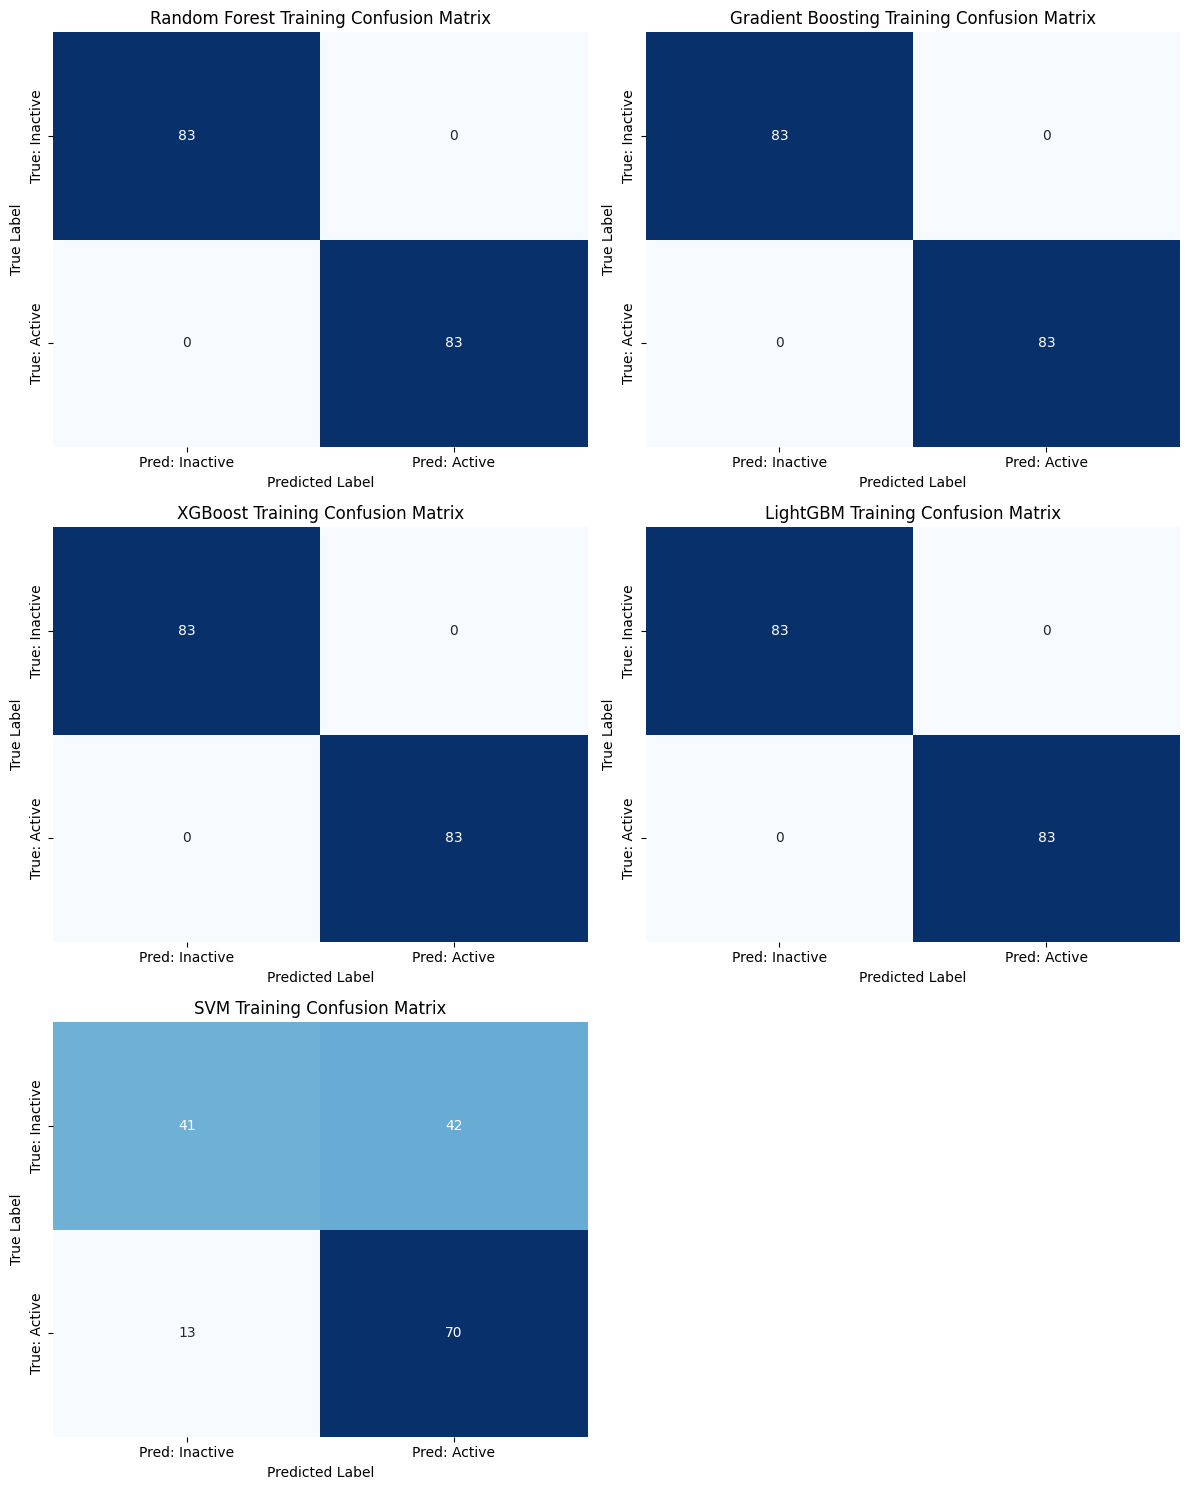

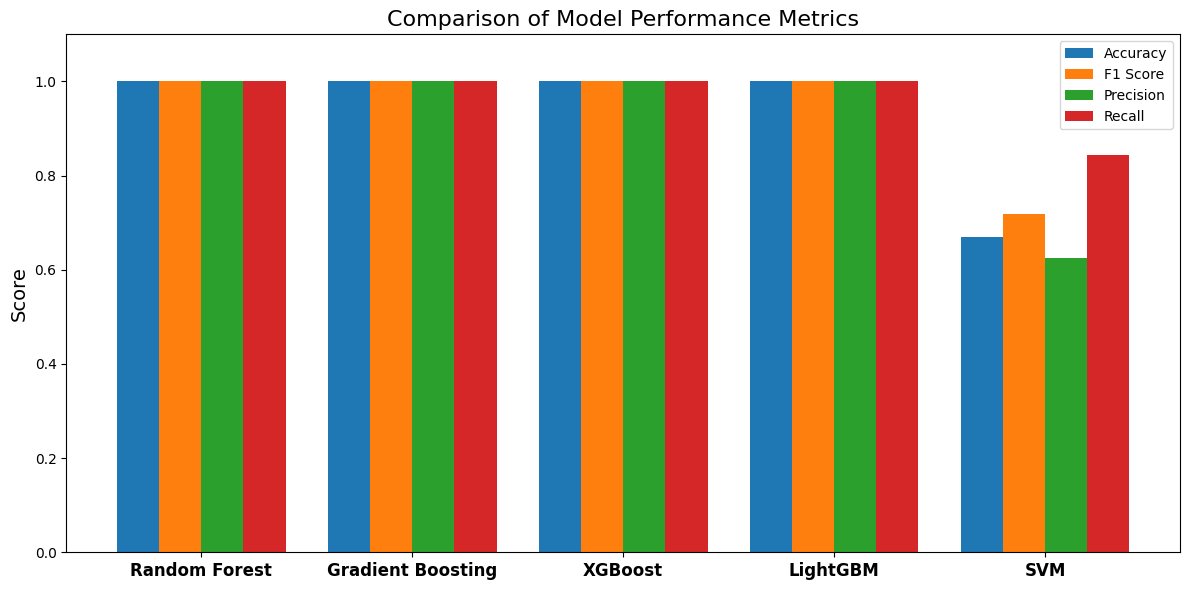

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
X_balanced_numeric = X_balanced.drop(columns=['Sequence'])

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Prepare to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

# Create confusion matrix plot grid
n_models = len(models)
rows = (n_models + 1) // 2
cols = 2
fig_cm, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
axes = axes.flatten()

# Train, predict, evaluate and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    acc = accuracy_score(y_balanced, y_pred)
    f1 = f1_score(y_balanced, y_pred)
    prec = precision_score(y_balanced, y_pred)
    rec = recall_score(y_balanced, y_pred)

    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print('-' * 50)

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)
    results['Precision'].append(prec)
    results['Recall'].append(rec)

    # Plot confusion matrix
    cm = confusion_matrix(y_balanced, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes[i])
    axes[i].set_title(f'{name} Training Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots if number of models is odd
for j in range(i + 1, len(axes)):
    fig_cm.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot metrics comparison bar chart
results_df = pd.DataFrame(results)
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(results_df['Model']))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()


Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000
--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

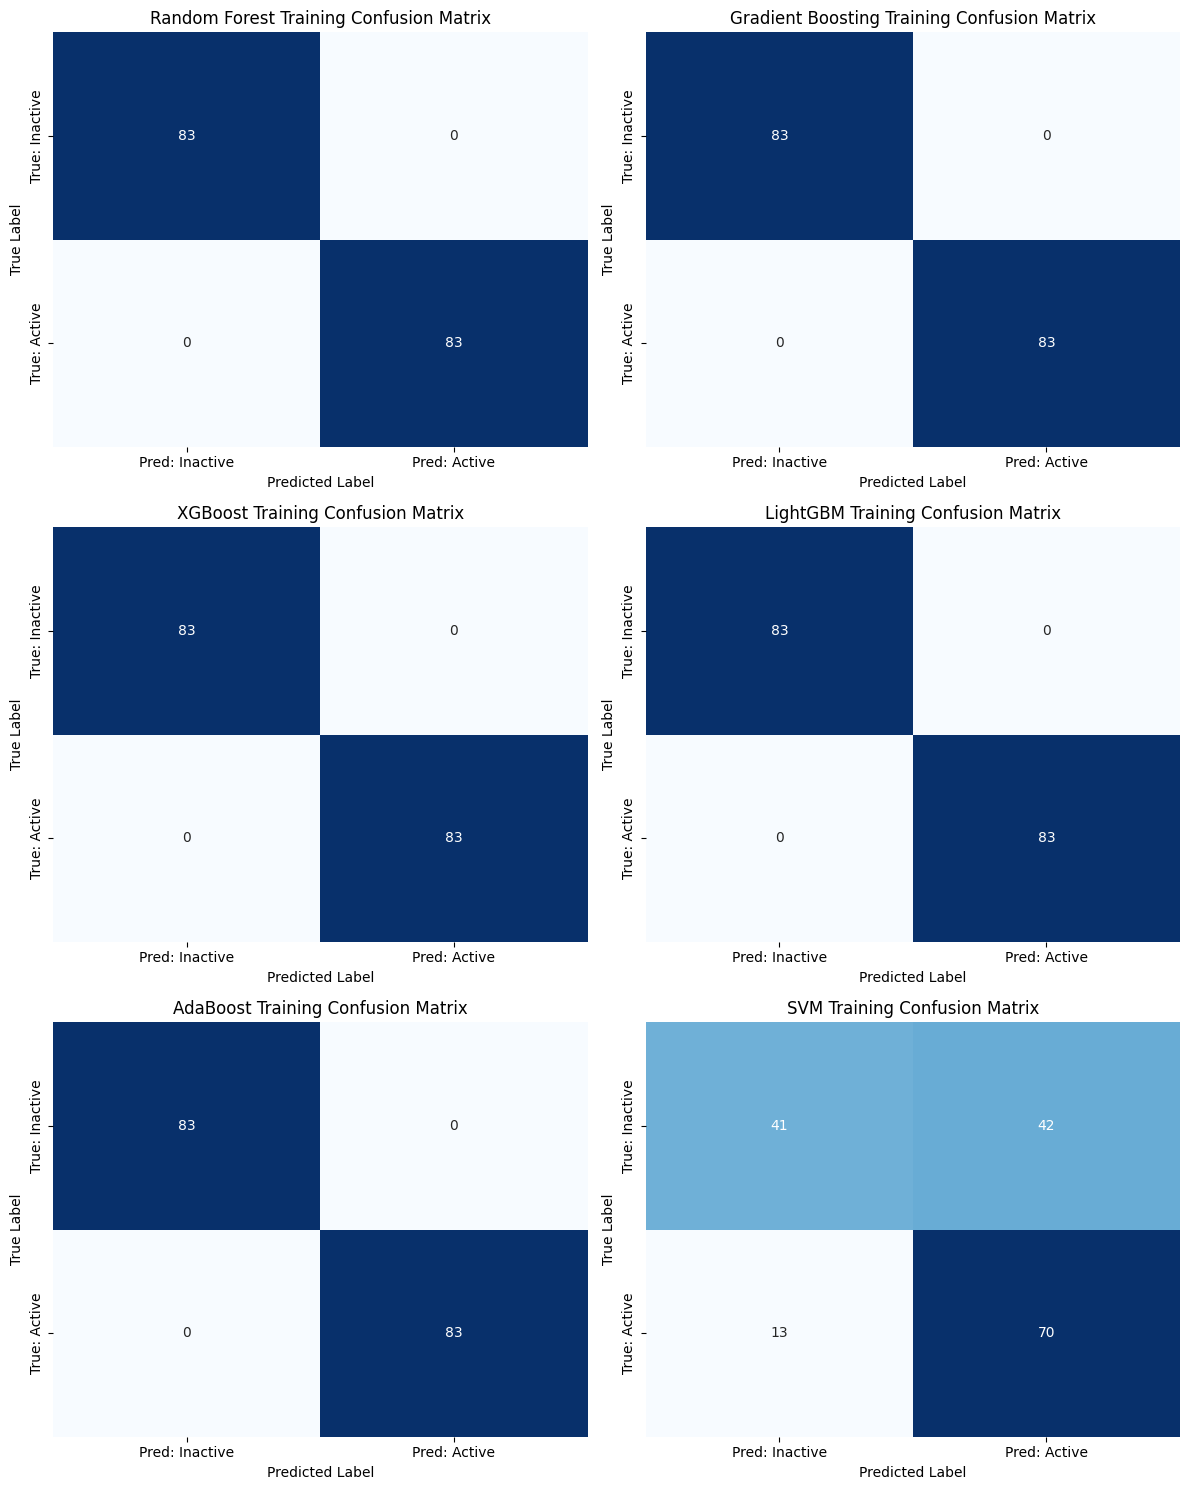

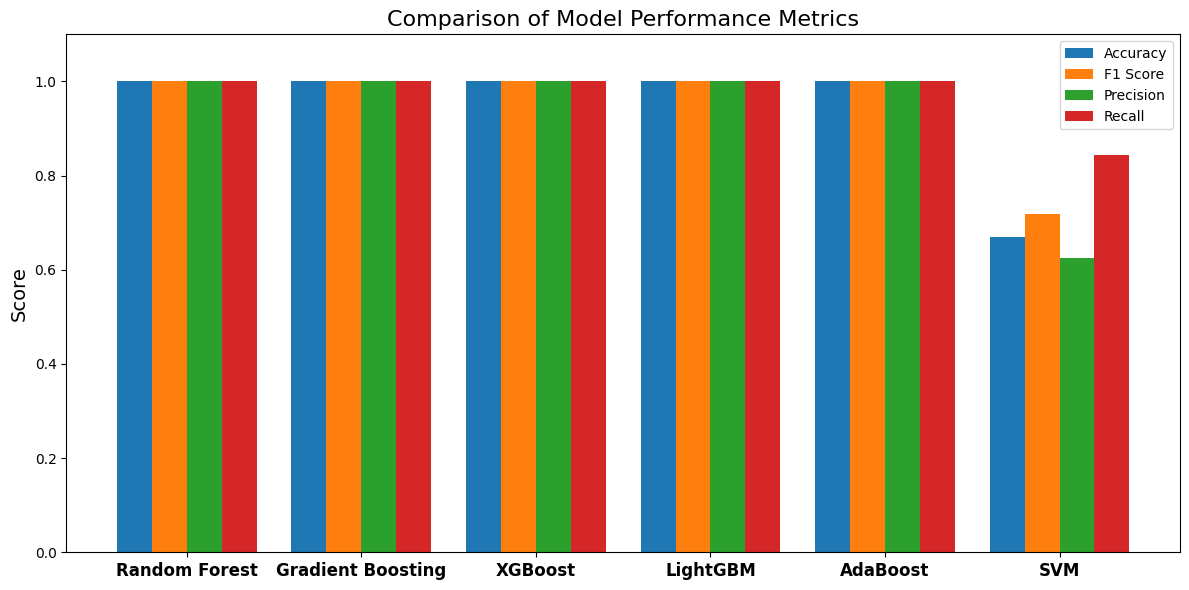

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
X_balanced_numeric = X_balanced.drop(columns=['Sequence'])

# Initialize models including AdaBoost
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Prepare to store metrics
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': []
}

# Create confusion matrix plot grid
n_models = len(models)
rows = (n_models + 1) // 2
cols = 2
fig_cm, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
axes = axes.flatten()

# Train, predict, evaluate and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced_numeric, y_balanced)
    y_pred = model.predict(X_balanced_numeric)

    acc = accuracy_score(y_balanced, y_pred)
    f1 = f1_score(y_balanced, y_pred)
    prec = precision_score(y_balanced, y_pred)
    rec = recall_score(y_balanced, y_pred)

    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    print('-' * 50)

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['F1 Score'].append(f1)
    results['Precision'].append(prec)
    results['Recall'].append(rec)

    # Plot confusion matrix
    cm = confusion_matrix(y_balanced, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes[i])
    axes[i].set_title(f'{name} Training Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots if number of models is odd
for j in range(i + 1, len(axes)):
    fig_cm.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot metrics comparison bar chart
results_df = pd.DataFrame(results)
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
x = np.arange(len(results_df['Model']))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(results_df['Model'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Comparison of Model Performance Metrics', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()


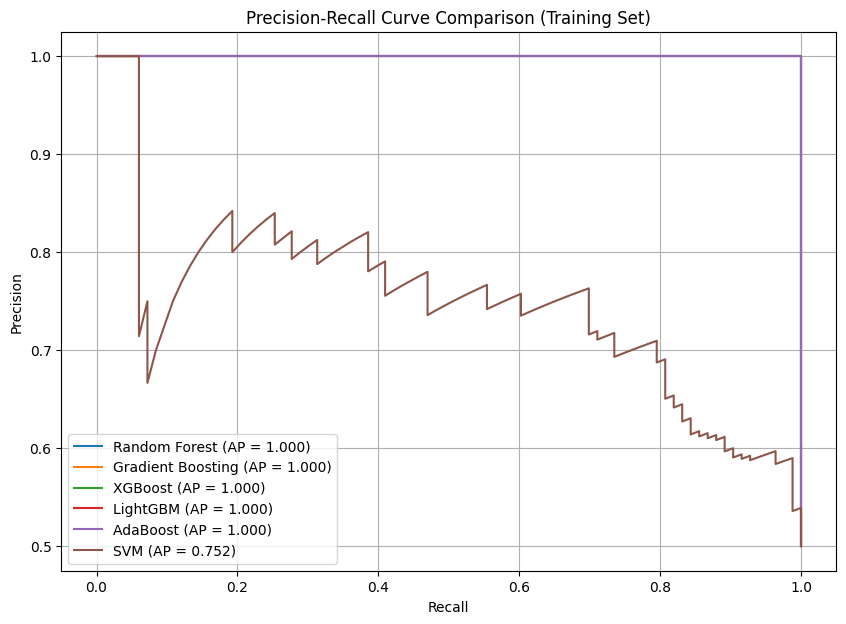

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get predicted probabilities for positive class
    try:
        y_prob = model.predict_proba(X_balanced_numeric)[:, 1]
    except AttributeError:
        # fallback if model doesn't have predict_proba
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_balanced_numeric)
        else:
            y_prob = model.predict(X_balanced_numeric)
            print(f"Warning: Model {name} has no probability estimates, PR curve may be less accurate.")

    precision, recall, _ = precision_recall_curve(y_balanced, y_prob)
    ap_score = average_precision_score(y_balanced, y_prob)

    plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison (Training Set)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Training and evaluating Random Forest...
Random Forest Test Accuracy: 0.9271
Random Forest Test F1 Score: 0.8372
Random Forest Test Sensitivity: 0.8571
Random Forest Test ROC AUC: 0.9822
Random Forest Test PR AUC: 0.9457
Random Forest Confusion Matrix:
[[71  4]
 [ 3 18]]
------------------------------------------------------------
Training and evaluating Gradient Boosting...
Gradient Boosting Test Accuracy: 0.9375
Gradient Boosting Test F1 Score: 0.8571
Gradient Boosting Test Sensitivity: 0.8571
Gradient Boosting Test ROC AUC: 0.9797
Gradient Boosting Test PR AUC: 0.9357
Gradient Boosting Confusion Matrix:
[[72  3]
 [ 3 18]]
------------------------------------------------------------
Training and evaluating XGBoost...
XGBoost Test Accuracy: 0.9271
XGBoost Test F1 Score: 0.8372
XGBoost Test Sensitivity: 0.8571
XGBoost Test ROC AUC: 0.9771
XGBoost Test PR AUC: 0.9234
XGBoost Confusion Matrix:
[[71  4]
 [ 3 18]]
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

<Figure size 1500x1000 with 0 Axes>

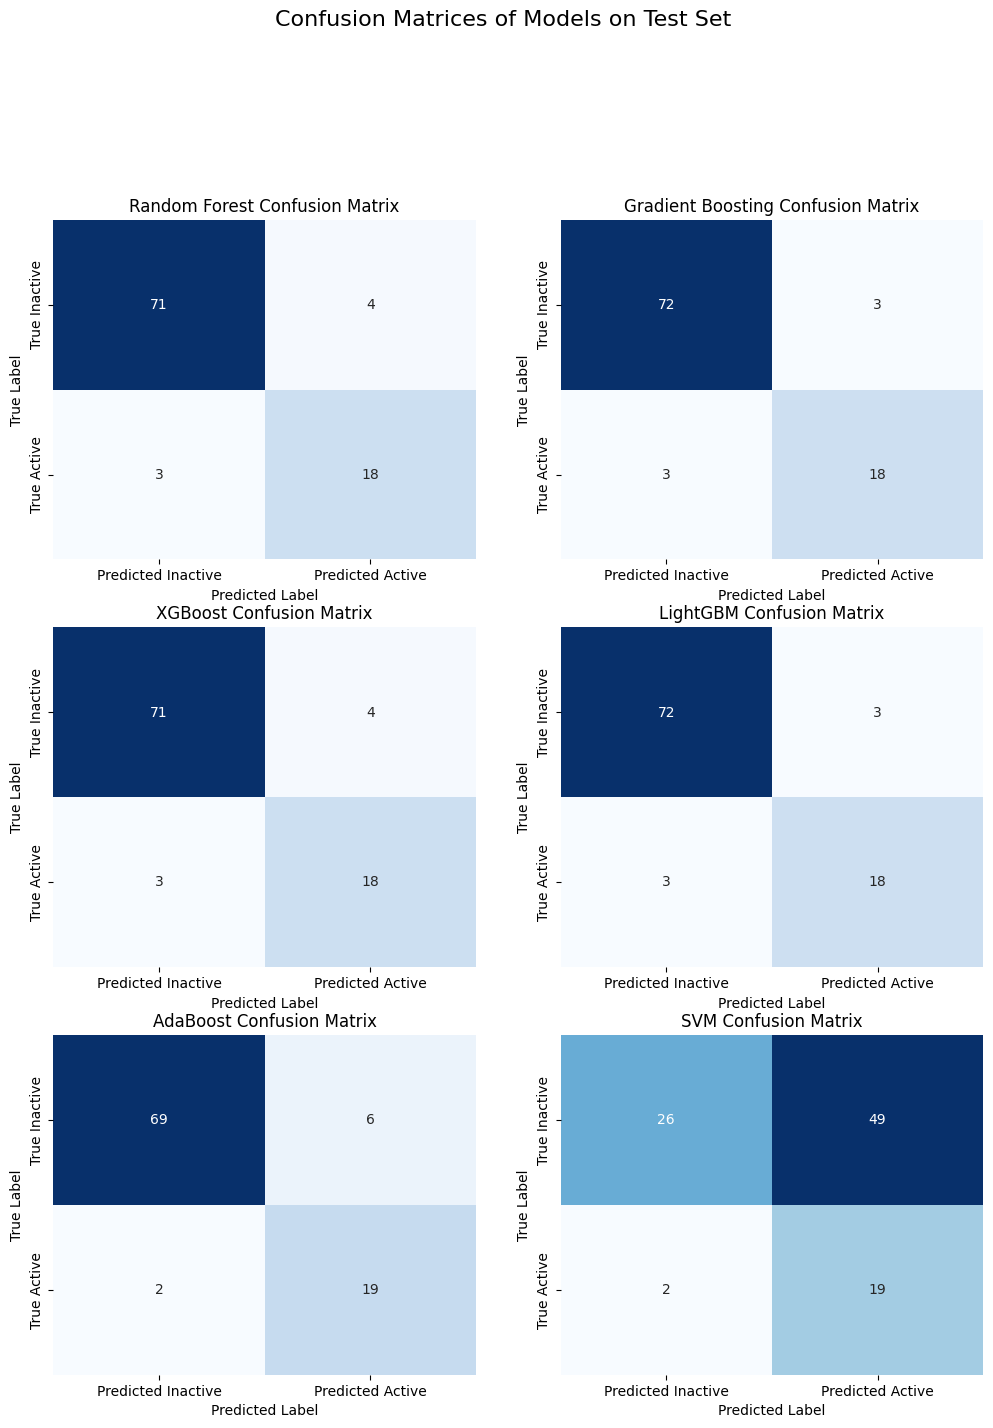

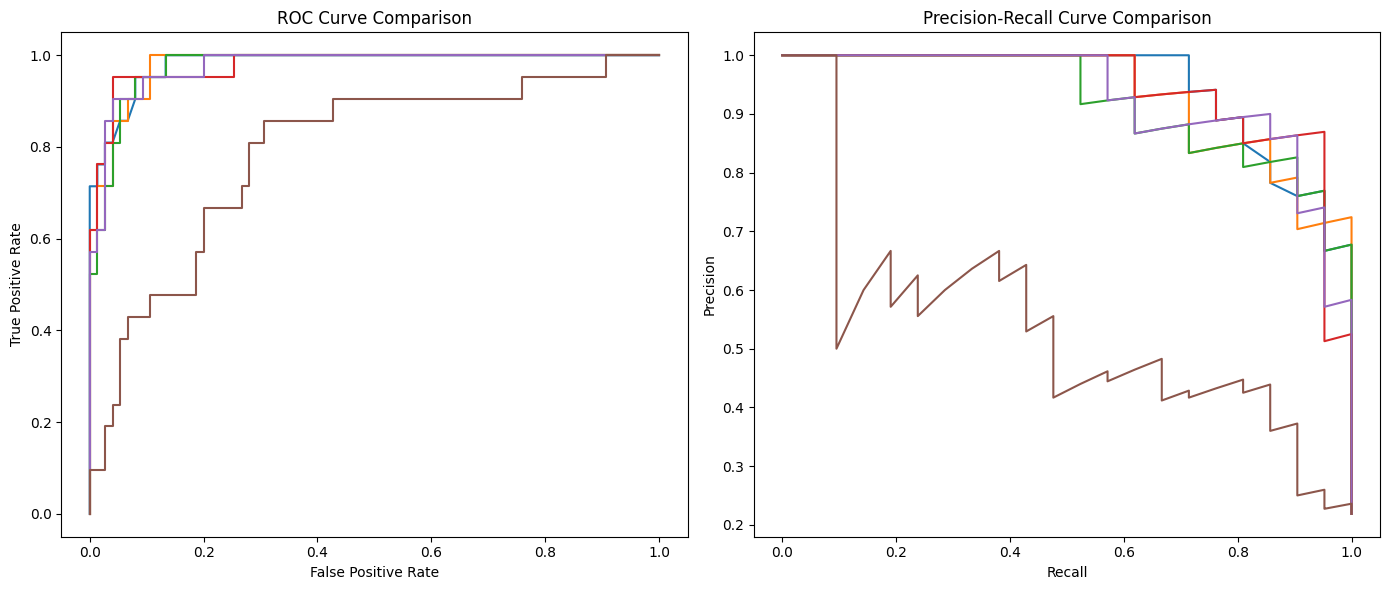

<ipython-input-20-81c1332e7e86>:133: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


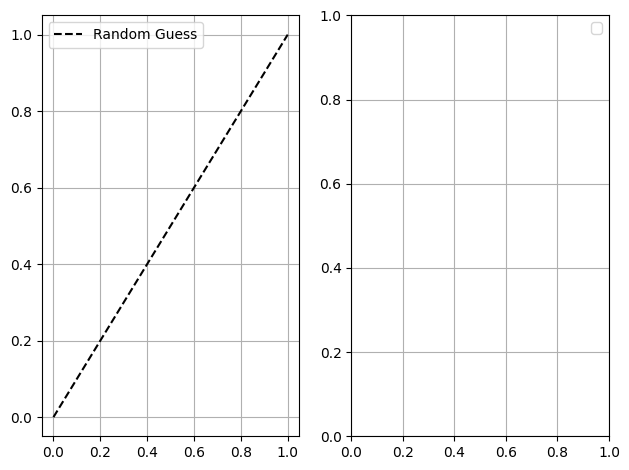

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, recall_score, precision_recall_curve,
    roc_curve
)

# Load balanced training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Remove non-numeric 'Sequence' column before training
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Prepare to collect results and for plotting
results = {}
plt.figure(figsize=(15, 10))

# For confusion matrices
fig_cm, axes_cm = plt.subplots((len(models) + 1)//2, 2, figsize=(12, 5*((len(models)+1)//2)))
axes_cm = axes_cm.flatten()

# For ROC and PR curves
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for i, (name, model) in enumerate(models.items()):
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Predict probabilities for ROC and PR curves
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # For SVM or models without predict_proba
        y_prob = model.decision_function(X_test)

    # Metrics
    acc = (y_pred == y_test).mean()
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    print(f"{name} Test Accuracy: {acc:.4f}")
    print(f"{name} Test F1 Score: {f1:.4f}")
    print(f"{name} Test Sensitivity: {sensitivity:.4f}")
    print(f"{name} Test ROC AUC: {roc_auc:.4f}")
    print(f"{name} Test PR AUC: {pr_auc:.4f}")
    print(f"{name} Confusion Matrix:\n{cm}")
    print('-'*60)

    results[name] = {
        'accuracy': acc,
        'f1': f1,
        'sensitivity': sensitivity,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm
    }

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Inactive', 'Predicted Active'],
                yticklabels=['True Inactive', 'True Active'],
                ax=axes_cm[i])
    axes_cm[i].set_title(f'{name} Confusion Matrix')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('True Label')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

# Hide unused confusion matrix plots if any
for j in range(i+1, len(axes_cm)):
    fig_cm.delaxes(axes_cm[j])

plt.tight_layout()
fig_cm.suptitle('Confusion Matrices of Models on Test Set', fontsize=16, y=1.02)
plt.show()

# Finalize ROC and PR curve plots
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:16:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

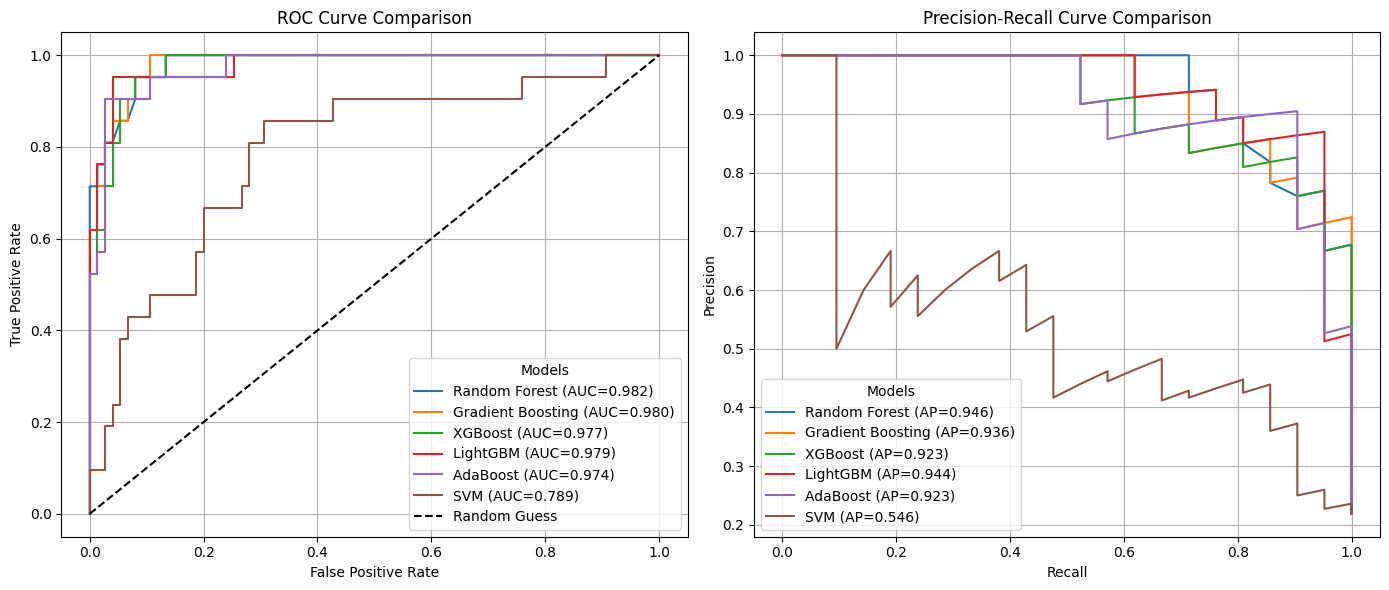

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, recall_score, precision_recall_curve, roc_curve
)
import joblib

# Load balanced training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' column if exists
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

# Evaluate and plot
plt.figure(figsize=(14, 6))

# ROC Curve Plot
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Precision-Recall Curve Plot
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for name, model in models.items():
    # Predict probabilities for test set (handle SVM or models without predict_proba)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {name} model has no predict_proba or decision_function; using predictions.")

    y_pred = model.predict(X_test)

    # Compute metrics
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend(loc='lower right', fontsize=10, title='Models')
plt.grid()

plt.subplot(1, 2, 2)
plt.legend(loc='lower left', fontsize=10, title='Models')
plt.grid()

plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    confusion_matrix, matthews_corrcoef, recall_score, precision_recall_curve, roc_curve, accuracy_score
)

# Load balanced training data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_train_balanced.csv').squeeze()

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' column if exists in training data before training
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Drop 'Sequence' column if exists in test data before evaluation
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])


# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

print("Training models...")
for name, model in models.items():
    model.fit(X_train, y_train) # Use X_train without 'Sequence'

print("\nEvaluating on test data:")

results = []

for name, model in models.items():
    try:
        # Predict probabilities for test set (handle SVM or models without predict_proba)
        # Use X_test without 'Sequence' for prediction
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {name} model has no predict_proba or decision_function; using predictions.")

    # Predict class labels using X_test without 'Sequence'
    y_pred = model.predict(X_test)

    # Confusion matrix and components
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)


    print(f"\n{name} Test Metrics:")
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'MCC': mcc,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'F1 Score': f1
    })

Training models...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 83, number of negative: 83
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

predict test set

In [49]:
import joblib
import os
import pandas as pd
from sklearn.metrics import (
    accuracy_score, recall_score, confusion_matrix,
    matthews_corrcoef, roc_auc_score, average_precision_score, f1_score
)

# Define path where your models are saved
save_dir = '/content/drive/MyDrive/EC/EC balance/saved_models'

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

# Drop 'Sequence' if exists
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# List all model files in the directory
model_files = [f for f in os.listdir(save_dir) if f.endswith('.pkl')]

results = []

for model_file in model_files:
    model_path = os.path.join(save_dir, model_file)
    model_name = model_file.replace('_model.pkl', '').replace('_', ' ').title()
    print(f"Loading and evaluating model: {model_name}")

    # Load model
    model = joblib.load(model_path)

    # Predict probabilities or fallback to decision function or predict
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {model_name} does not support predict_proba or decision_function; using predictions.")

    # Predict class labels
    y_pred = model.predict(X_test)

    # Confusion matrix and components
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Test Metrics:")
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print("-" * 40)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'MCC': mcc,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'F1 Score': f1
    })

# Optionally convert results to DataFrame for better display or saving
results_df = pd.DataFrame(results)
print(results_df)


Loading and evaluating model: Random Forest
Random Forest Test Metrics:
Accuracy   : 0.9271
Sensitivity: 0.8571
Specificity: 0.9467
MCC        : 0.7906
ROC AUC    : 0.9822
PR AUC     : 0.9468
F1 Score   : 0.8372
----------------------------------------
Loading and evaluating model: Gradient Boosting
Gradient Boosting Test Metrics:
Accuracy   : 0.9375
Sensitivity: 0.8571
Specificity: 0.9600
MCC        : 0.8171
ROC AUC    : 0.9822
PR AUC     : 0.9437
F1 Score   : 0.8571
----------------------------------------
Loading and evaluating model: Xgboost
Xgboost Test Metrics:
Accuracy   : 0.9271
Sensitivity: 0.8571
Specificity: 0.9467
MCC        : 0.7906
ROC AUC    : 0.9727
PR AUC     : 0.9139
F1 Score   : 0.8372
----------------------------------------
Loading and evaluating model: Lightgbm
Lightgbm Test Metrics:
Accuracy   : 0.9375
Sensitivity: 0.8571
Specificity: 0.9600
MCC        : 0.8171
ROC AUC    : 0.9352
PR AUC     : 0.8795
F1 Score   : 0.8571
----------------------------------------
Lo

In [50]:
import joblib
import os

save_dir = '/content/drive/MyDrive/EC/EC balance/saved_models'
os.makedirs(save_dir, exist_ok=True)

for name, model in best_models.items():
    filename = os.path.join(save_dir, f"{name.replace(' ', '_')}_model.pkl")
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")

Saved Random Forest model to /content/drive/MyDrive/EC/EC balance/saved_models/Random_Forest_model.pkl
Saved Gradient Boosting model to /content/drive/MyDrive/EC/EC balance/saved_models/Gradient_Boosting_model.pkl
Saved XGBoost model to /content/drive/MyDrive/EC/EC balance/saved_models/XGBoost_model.pkl
Saved LightGBM model to /content/drive/MyDrive/EC/EC balance/saved_models/LightGBM_model.pkl
Saved SVM model to /content/drive/MyDrive/EC/EC balance/saved_models/SVM_model.pkl



Evaluating model: Random Forest
Accuracy   : 0.9271
F1 Score   : 0.8372
Precision  : 0.8182
Recall     : 0.8571
Specificity: 0.9467
MCC        : 0.7906
ROC AUC    : 0.9822
PR AUC     : 0.9468


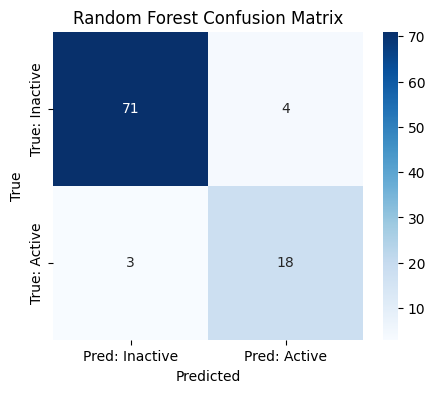


Evaluating model: Gradient Boosting
Accuracy   : 0.9375
F1 Score   : 0.8571
Precision  : 0.8571
Recall     : 0.8571
Specificity: 0.9600
MCC        : 0.8171
ROC AUC    : 0.9822
PR AUC     : 0.9437


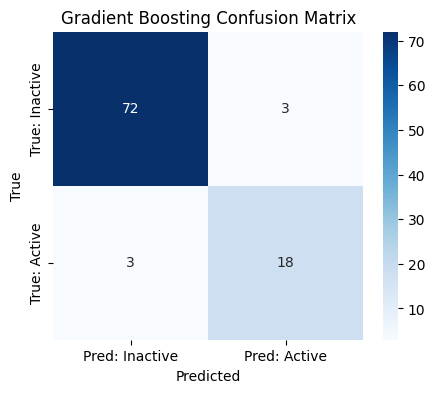


Evaluating model: Xgboost
Accuracy   : 0.9271
F1 Score   : 0.8372
Precision  : 0.8182
Recall     : 0.8571
Specificity: 0.9467
MCC        : 0.7906
ROC AUC    : 0.9727
PR AUC     : 0.9139


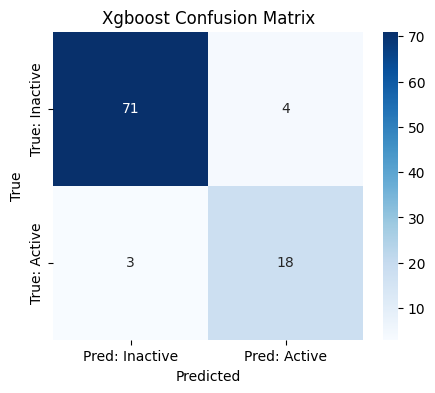


Evaluating model: Lightgbm
Accuracy   : 0.9375
F1 Score   : 0.8571
Precision  : 0.8571
Recall     : 0.8571
Specificity: 0.9600
MCC        : 0.8171
ROC AUC    : 0.9352
PR AUC     : 0.8795


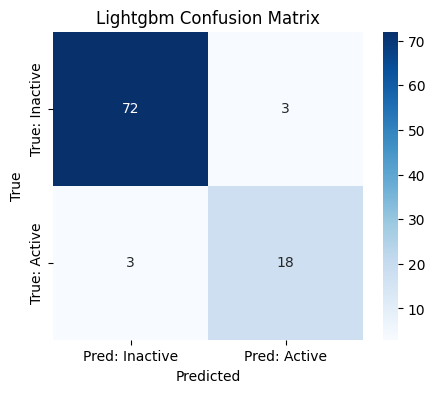


Evaluating model: Svm
Accuracy   : 0.9688
F1 Score   : 0.9302
Precision  : 0.9091
Recall     : 0.9524
Specificity: 0.9733
MCC        : 0.9105
ROC AUC    : 0.9962
PR AUC     : 0.9886


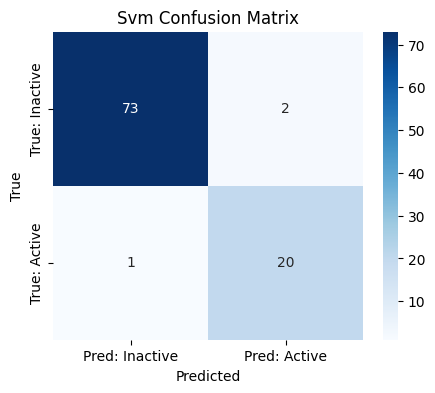

In [51]:
import joblib
import os
import pandas as pd
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, matthews_corrcoef, roc_auc_score, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Path where models are saved
save_dir = '/content/drive/MyDrive/EC/EC balance/saved_models'

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC balance/y_test.csv').squeeze()

# Drop 'Sequence' column if present
if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Load models
model_files = [f for f in os.listdir(save_dir) if f.endswith('.pkl')]
models = {}
for file in model_files:
    model_name = file.replace('_model.pkl', '').replace('_', ' ').title()
    models[model_name] = joblib.load(os.path.join(save_dir, file))

# Evaluate each loaded model on the test set
for name, model in models.items():
    print(f"\nEvaluating model: {name}")

    # Predict probabilities for ROC AUC and PR AUC
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        if hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = model.predict(X_test)
            print(f"Warning: {name} model does not support predict_proba or decision_function; using predictions.")

    # Predict class labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC        : {mcc:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print(f"PR AUC     : {pr_auc:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [52]:
pip install lime


In [53]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import os # Import os to ensure the save directory exists

# Load model
# Check if the model file exists before loading
model_path = '/content/drive/MyDrive/EC/EC balance/saved_models/Random_Forest_model.pkl'
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")
    # Exit or handle the error appropriately
else:
    model = joblib.load(model_path)

# Load your training data (needed by LIME to understand feature distribution)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')

# Remove non-numeric 'Sequence' column before passing to LIME
X_train_numeric = X_train.drop(columns=['Sequence'])

# Load a sample to explain from test or new data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_test_features.csv')

# Remove non-numeric 'Sequence' column from the instance as well
X_test_numeric = X_test.drop(columns=['Sequence'])
instance = X_test_numeric.iloc[0].values  # explain first test instance using numeric data


# Initialize Lime explainer using the numeric training data
explainer = LimeTabularExplainer(
    training_data=X_train_numeric.values, # Use numeric training data
    feature_names=X_train_numeric.columns.tolist(), # Use names from numeric data
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Explain prediction for the chosen instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print explanation as text
print(exp.as_list())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('4.00 < Charge <= 6.00', 0.10981086260928295), ('K > 19.81', 0.09645938900854514), ('9.61 < Isoelectric_Point <= 10.79', 0.08443030568598694), ('D <= 0.00', 0.06946871751518283), ('E <= 0.00', 0.05390945272398129), ('Q <= 0.00', 0.018584338246463043), ('0.40 < Flexibility <= 0.47', 0.016689289519239908), ('T > 5.52', -0.015547393680490525), ('R <= 0.00', -0.014411604836733101), ('3.11 < G <= 6.67', -0.014373212537333124)]


In [54]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import os

# Load model
model_path = '/content/drive/MyDrive/EC/EC balance/saved_models/Random_Forest_model.pkl'
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}")

else:
    model = joblib.load(model_path)

# Load your training data (needed by LIME to understand feature distribution)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_train_balanced.csv')

# Remove non-numeric 'Sequence' column before passing to LIME explainer
X_train_numeric = X_train.drop(columns=['Sequence'])

# Load a sample to explain from test or new data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC balance/X_test_features.csv')

# Remove non-numeric 'Sequence' column from the instance you want to explain
X_test_numeric = X_test.drop(columns=['Sequence'])
instance = X_test_numeric.iloc[0].values  # explain first test instance using numeric data


explainer = LimeTabularExplainer(
    training_data=X_train_numeric.values,
    feature_names=X_train_numeric.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Explain prediction for the chosen instance using the numeric instance data
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print explanation as text
print(exp.as_list())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('4.00 < Charge <= 6.00', 0.10858499976715769), ('K > 19.81', 0.10265310006282101), ('9.61 < Isoelectric_Point <= 10.79', 0.09492013910730811), ('D <= 0.00', 0.07018021007105289), ('E <= 0.00', 0.04496650770276722), ('3.11 < G <= 6.67', -0.02102159504365798), ('N <= 0.00', 0.020719827950793097), ('T > 5.52', -0.020479301121890732), ('4.00 < S <= 8.79', -0.018625231686174384), ('9.00 < Helix <= 12.00', 0.0172919929818509)]
